In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
# from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicSpline
from matplotlib.ticker import ScalarFormatter
from matplotlib import pyplot as plt
from tqdm import tqdm
# from numba import njit, jit
import json

import sys
sys.path.append("./../src")
import scripts as plot_scripts  # plotting functions
plot_scripts.setup_rc_params()


# Let's assume that we are in the SLM folder. Given this is a jupyter notebook that should be reasonable
SLM_path = "./../Results/"
tov_path = "./../TOV_data/"

In [3]:
# define some useful figure things
dpi = 600 #1200
figsize = (7, 5)  # Goddam that is one big fig. Might make one giant Newton.
save_figures = True
save_location = "./../Plots"

tov_alpha = 0.65
SLM_alpha = 0.8
res_alpha = 0.6
scatter_size = 20
tick_size = 24
axis_label_size = 24
res_axis_label_size = 18
tov_linewidth = 2
SLM_dot_size = 30
res_linewidth = 3
title_size = 24
legend_size = 16

res_width = "60%"
res_height = 2.5

In [4]:
SLM_data_file_names = []
all_of_the_SLM_data = []
for SLM_file in sorted(os.listdir(SLM_path)):
    if (SLM_file[0] != ".") and (SLM_file != "QEOS"):
        print(SLM_file)
        with open(f"{SLM_path}/{SLM_file}") as f:
            temp_data = np.array(json.load(f)["Xdmd"])
            # temp_P = np.copy(temp_data[1, :])
            # temp_M = np.copy(temp_data[2, :])
            # temp_data[1, :] = temp_M
            # temp_data[2, :] = temp_P
        SLM_data_file_names.append(SLM_file)
        all_of_the_SLM_data.append(temp_data)
all_of_the_SLM_data = np.array(all_of_the_SLM_data)  # this is a dict object
# all_of_the_SLM_data = np.transpose(all_of_the_SLM_data, (0, 2, 1))  # just personal preference

print("")

tov_data_file_names = []
all_of_the_tov_data = []
for tov_file in sorted(os.listdir(tov_path)):
    if (tov_file[0] != ".") and (tov_file != "QEOS"):
        print(tov_file)
        with open(f"{tov_path}/{tov_file}") as f:
            temp_data = np.loadtxt(f)
            print(temp_data.shape)
            temp_M = np.copy(temp_data[:, 1])
            temp_P = np.copy(temp_data[:, 2])
            temp_data[:, 1] = temp_P
            temp_data[:, 2] = temp_M
        tov_data_file_names.append(tov_file)
        all_of_the_tov_data.append(temp_data)
all_of_the_tov_data = np.array(all_of_the_tov_data)
all_of_the_tov_data = np.transpose(all_of_the_tov_data, (0, 2, 1))  # just personal preference


# manually entered to avoid annoying formatting of strings
eos_file_names = ["BL", "DSCMF", "FSU Garnet", "APR", "SLy4"]

SLM_BL_eos.dat
SLM_DS_CMF_eos.dat
SLM_FSUGarnetNStarEOSA.dat
SLM_apr_eos.dat
SLM_sorted_Sly4.dat

rpm_results_BL_eos.dat
(50, 4)
rpm_results_DS_CMF_eos.dat
(50, 4)
rpm_results_FSUGarnetNStarEOSA.dat
(50, 4)
rpm_results_apr_eos.dat
(50, 4)
rpm_results_sorted_Sly4.dat
(50, 4)


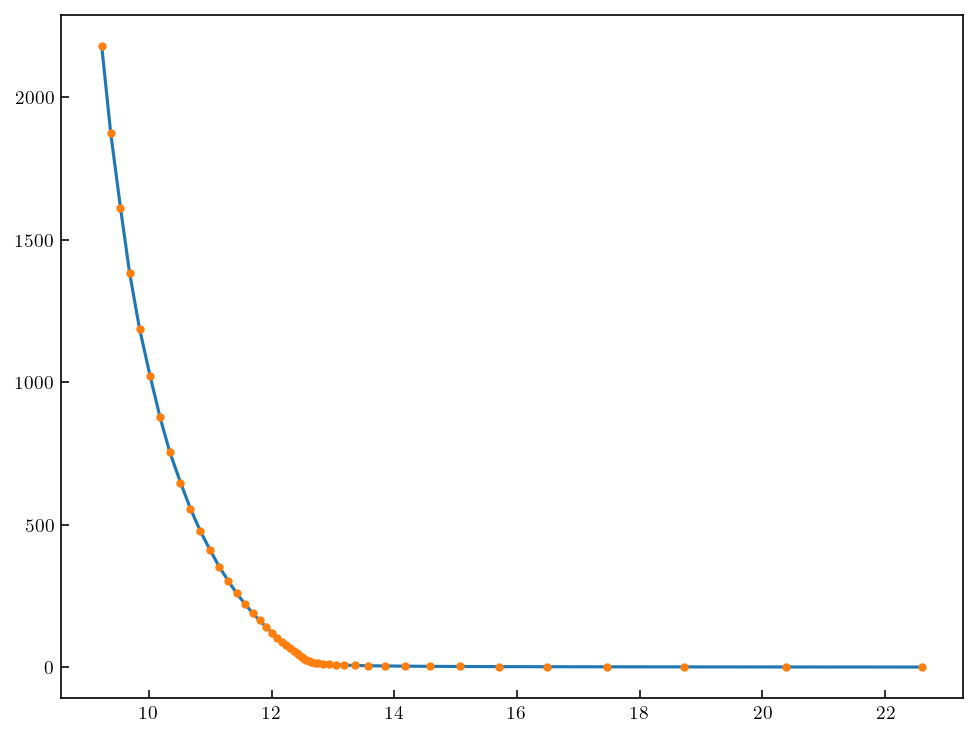

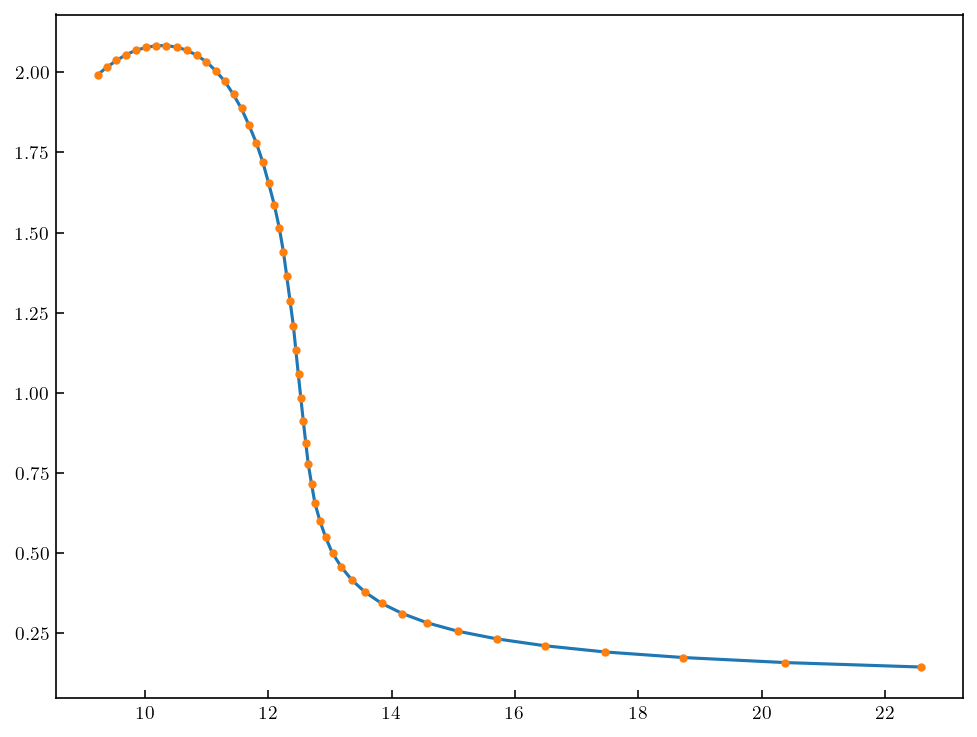

In [5]:
plt.plot(all_of_the_tov_data[0, 0], all_of_the_tov_data[0, 1])
plt.plot(all_of_the_SLM_data[0, 0], all_of_the_SLM_data[0, 1], ".")
plt.show()

plt.plot(all_of_the_tov_data[0, 0], all_of_the_tov_data[0, 2])
plt.plot(all_of_the_SLM_data[0, 0], all_of_the_SLM_data[0, 2], ".")
plt.show()

In [6]:
"""
SLM_run.keys()
>>> dict_keys(['XSLM', 'b', 'lam', 'omega', 'phi', 'time'])

This is laid out in SLMScript.py, inside of the 
function SLM(). This lays between lines 79 - 138.

Meaning of the keys -- 
- XSLM: snapshots
- b: eigenvector
- lam: eigenvalues
- omega: the mode -> exp(i omega t)
- phi: A phi = b
- time: the _index_ (not the _time) 
"""

print("")

In [7]:
def the_good_interpolator(x_tov, y_tov, x_SLM):
    # Create a normalized parameter t that corresponds to the original x values
    t_original = np.linspace(0, 1, num=len(x_tov))
    
    # Create cubic splines for original x and y
    cs_x = CubicSpline(t_original, x_tov, bc_type='natural')
    cs_y = CubicSpline(t_original, y_tov, bc_type='natural')
    
    # Create a new parameter t for the new x-values
    t_new = np.linspace(0, 1, num=len(x_SLM))
    
    # Interpolate to find the corresponding y-values for the new x-values
    y_new = cs_y(t_new)
    
    return x_SLM, y_new

In [46]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]
    #subax = fig.add_axes([x,y,width,height],facecolor=facecolor)  # matplotlib 2.0+
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    # subax.xaxis.set_tick_params(labelsize=x_labelsize)
    # subax.yaxis.set_tick_params(labelsize=y_labelsize)
    
    size = 12
    subax.xaxis.set_tick_params(labelsize=size)
    subax.yaxis.set_tick_params(labelsize=size)
    # subax.set_ylim(1e-8, subax.get_ylim()[1])
    return subax

In [47]:
# def make_the_axes_look_nice(axis):
#     axis.tick_params(which='minor', length=2)
#     axis.tick_params(bottom=True, labelbottom=True,
#                     top=True, labeltop=False,
#                     right=True, labelright=False,
#                     left=True, labelleft=True)
#     axis.xaxis.set_tick_params(labelsize=tick_size / 1.5)
#     axis.xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
#     axis.xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
#     axis.yaxis.set_tick_params(labelsize=tick_size / 1.5)
#     axis.yaxis.set_ticks_position('both')  # get minor ticks on left and right sides


from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter, MultipleLocator

def make_the_axes_look_nice(axis, y_minor=None):
    axis.tick_params(which='minor', length=2)
    axis.tick_params(bottom=True, labelbottom=True,
                    top=True, labeltop=False,
                    right=True, labelright=False,
                    left=True, labelleft=True)

    axis.xaxis.set_tick_params(labelsize=tick_size / 1.5)
    axis.xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())
    axis.xaxis.set_ticks_position('both')

    axis.yaxis.set_tick_params(labelsize=tick_size / 1.5)
    axis.yaxis.set_ticks_position('both')

    # --- NEW: control y-axis minor ticks ---
    if y_minor == "auto":
        axis.yaxis.set_minor_locator(AutoMinorLocator())
    elif y_minor == "log":
        axis.yaxis.set_minor_locator(LogLocator(base=10.0, subs=np.arange(2, 10)*0.1, numticks=10))
        axis.yaxis.set_minor_formatter(NullFormatter())
    elif isinstance(y_minor, (int, float)):
        # if user passes a fixed step size
        axis.yaxis.set_minor_locator(MultipleLocator(y_minor))


In [48]:
# # eos_file_names = ['BL', 'DSCMF', 'FSU Garnet', 'APR', 'SLy4']
# eos_file_names = ["BL"]

y scale: log
ylim: (np.float64(1e-10), np.float64(0.01))
minor locator: <matplotlib.ticker.FixedLocator object at 0x1244aee10>
rc ytick.minor.visible: False
minorticklines visible flags: [True, True, True, True, True, True, True, True, True, True]
figure saved


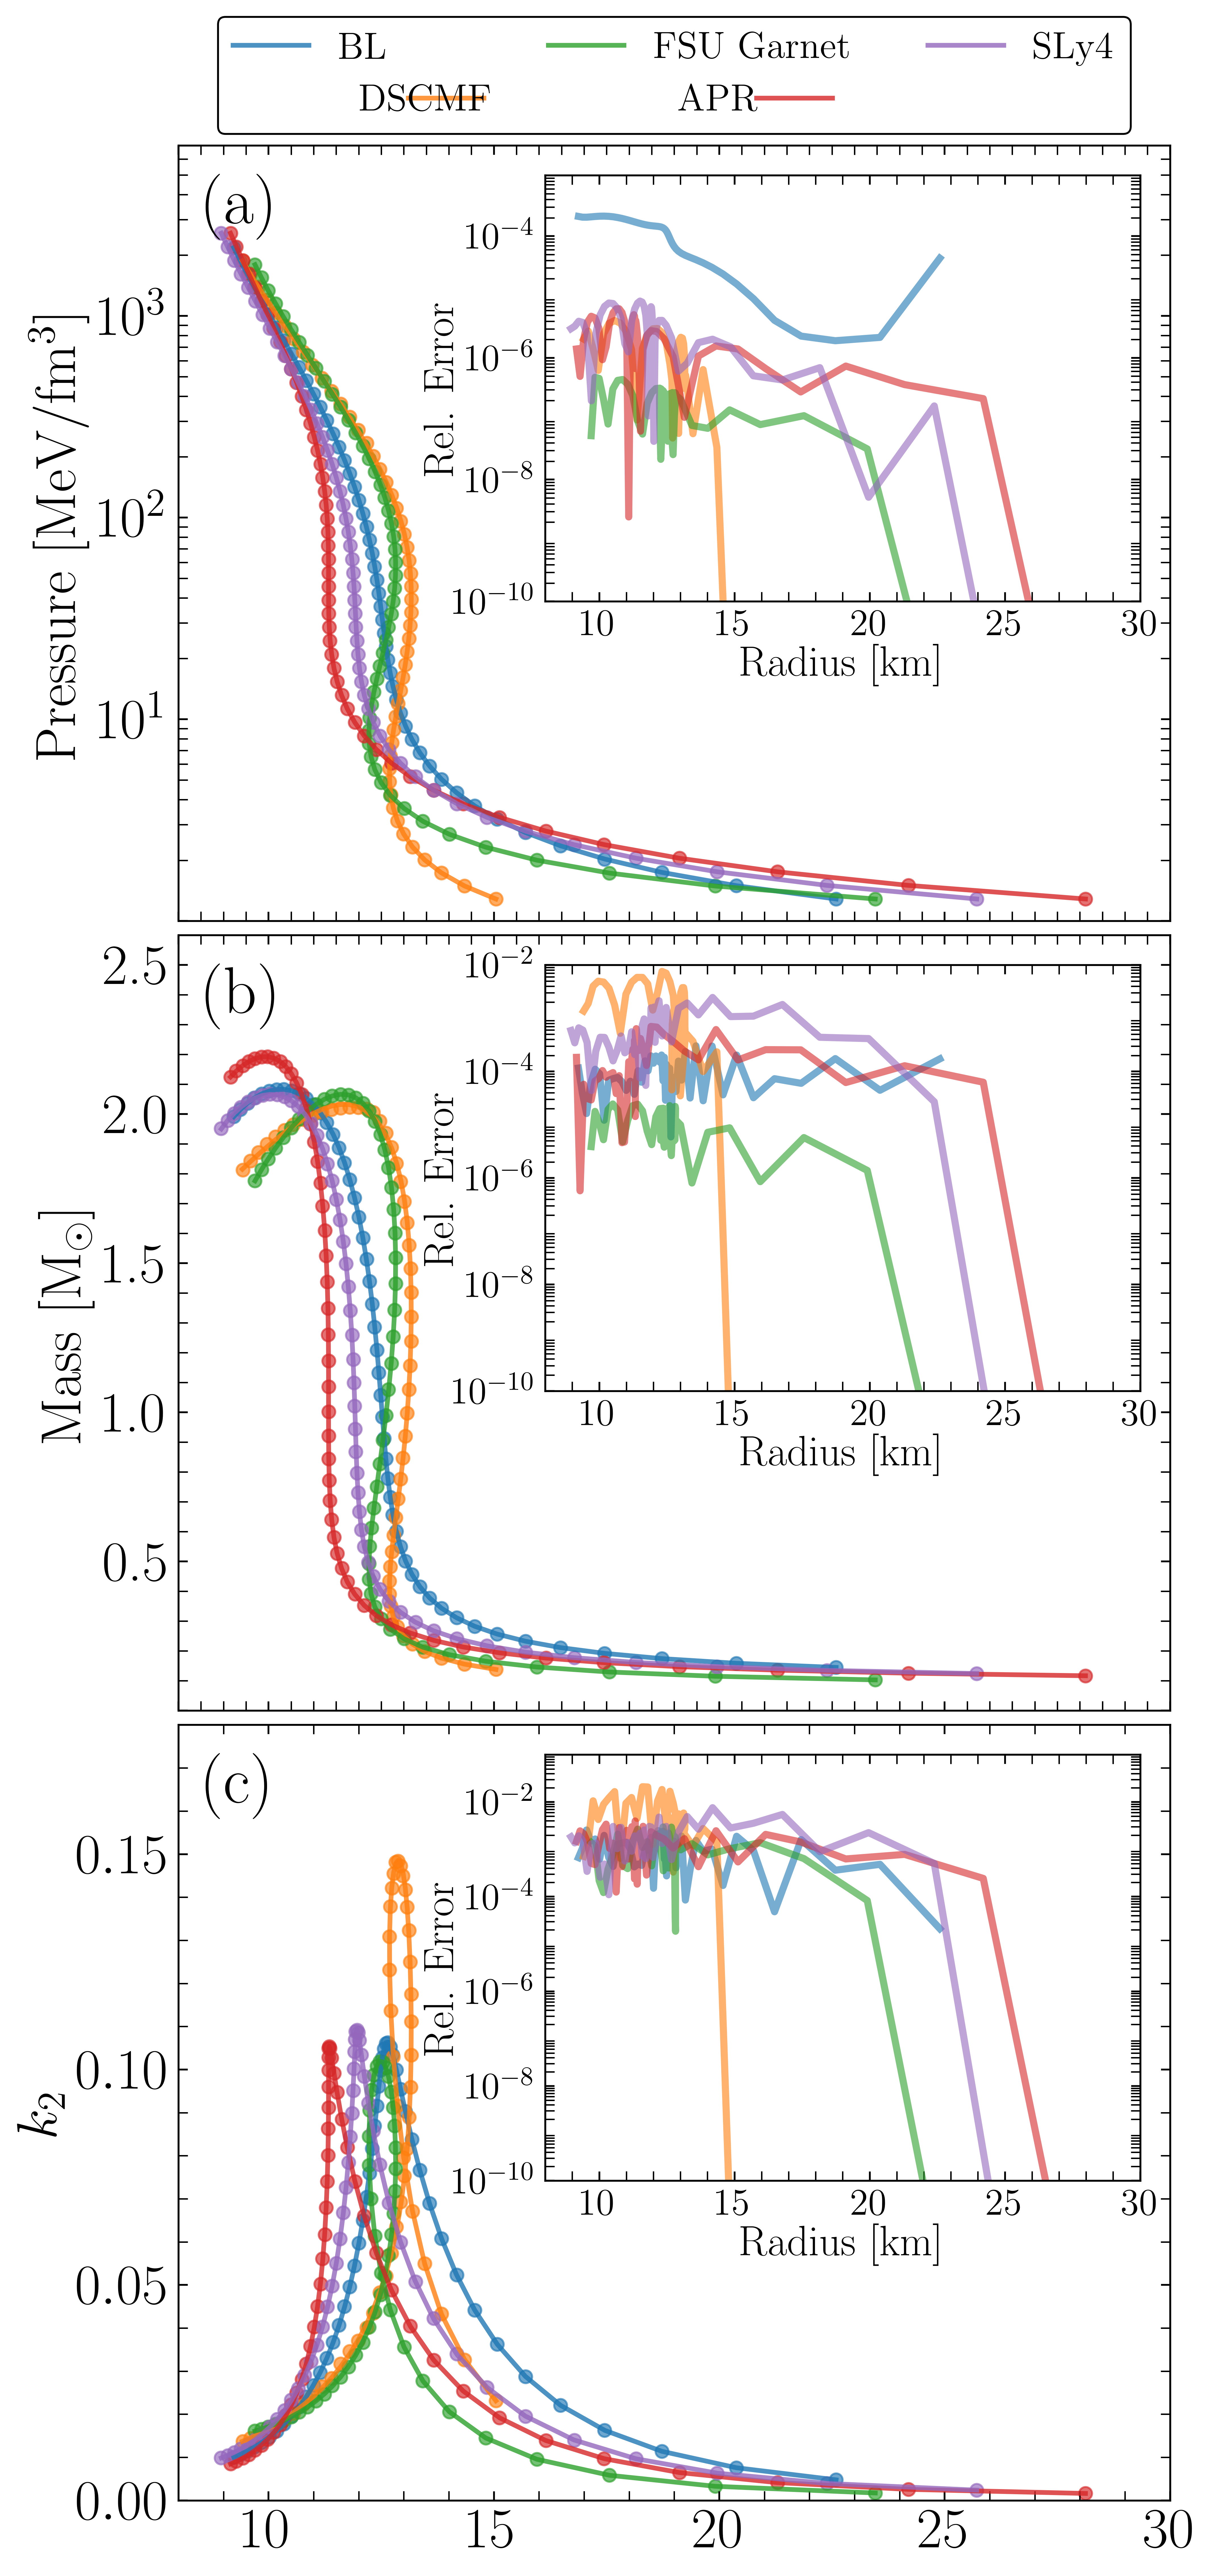

In [77]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def calc_error(FOM, ROM, method="rel"):
    if method == "sym rel":
        error = 2 * np.abs(FOM - ROM) / (np.abs(FOM) + np.abs(ROM))
    elif method == "rel":
        error = np.abs(FOM - ROM) / np.abs(FOM)
    elif method == "abs":
        error = np.abs(FOM - ROM)
    return error

another_tick_size = 4

min_R = 8
max_R = 30

fig, ax = plt.subplots(3, 1, dpi=dpi, figsize=(figsize[0], 3 * figsize[1]), constrained_layout=False)

# define the inset exes
# P-R
inset_ax_PR = inset_axes(ax[0],
                         width=res_width,
                         height=res_height,
                         loc="upper right", 
                         borderpad=1.4)
# M-R
inset_ax_MR = inset_axes(ax[1],
                         width=res_width,
                         height=res_height,
                         loc="upper right", 
                         borderpad=1.4)
# T-R
inset_ax_TR = inset_axes(ax[2],
                         width=res_width,
                         height=res_height,
                         loc="upper right", 
                         borderpad=1.4)


colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
lines_plotted = []
for i, eos_name in enumerate(eos_file_names):
    color = colors[i]
    tov_run = all_of_the_tov_data[i]
    SLM_run = all_of_the_SLM_data[i]

    
    SLM_x = SLM_run[0]
    
    # interpolate the data
    # pressure-radius (in log space)
    PR_x_new, PR_y_new = the_good_interpolator(tov_run[0, :], np.log(tov_run[1, :]), SLM_x)
    PR_y_new = np.exp(PR_y_new)
    # mass-radius
    MR_x_new, MR_y_new = the_good_interpolator(tov_run[0, :], tov_run[2, :], SLM_x)
    MR_y_new = MR_y_new
    # tidal-radius
    TR_x_new, TR_y_new = the_good_interpolator(tov_run[0, :], tov_run[3, :], SLM_x)
    TR_y_new = TR_y_new
    
    # TOV plots
    # the tov results
    # test = ax[0].plot(tov_run[0, :], tov_run[1, :], 
    #            color=color, 
    #            linewidth=tov_linewidth,
    #            alpha=tov_alpha, zorder=1, 
    #            label=f"{eos_name}")
    # ax[1].plot(tov_run[0, :], tov_run[2, :], 
    #            color=color, 
    #            linewidth=tov_linewidth,
    #            alpha=tov_alpha, zorder=1,
    #            label=f"{eos_name}")
    # ax[2].plot(tov_run[0, :], tov_run[3, :], 
    #            color=color, 
    #            linewidth=tov_linewidth,
    #            alpha=tov_alpha, zorder=1,
    #            label=f"{eos_name}")
    # lines_plotted.append(test)
    test = ax[0].scatter(tov_run[0, :], tov_run[1, :], 
                         color=color, 
                         # linewidth=tov_linewidth,
                         s=SLM_dot_size,
                         alpha=tov_alpha, zorder=1, )
                        #  label=f"{eos_name}")
    ax[1].scatter(tov_run[0, :], tov_run[2, :], 
                  color=color, 
                  # linewidth=tov_linewidth,
                  s=SLM_dot_size,
                  alpha=tov_alpha, zorder=1, )
                #   label=f"{eos_name}")
    ax[2].scatter(tov_run[0, :], tov_run[3, :], 
                  color=color, 
                  # linewidth=tov_linewidth,
                  s=SLM_dot_size,
                  alpha=tov_alpha, zorder=1, )
                #   label=f"{eos_name}")
    lines_plotted.append(test)
    
    # # the tov results interpolated onto the SLM x-values
    # ax[0].scatter(PR_x_new, PR_y_new, 
    #               color="black", zorder=3, s=5)
    # ax[1].scatter(MR_x_new, MR_y_new, 
    #               color="black", zorder=3, s=5)
    # ax[2].scatter(TR_x_new, TR_y_new, 
    #               color="black", zorder=3, s=10)
    
    # SLM plots
    ax[0].plot(SLM_x, SLM_run[1], 
               color=color, 
               # s=SLM_dot_size, 
               linewidth=tov_linewidth,
               alpha=SLM_alpha, zorder=2, 
               label=f"{eos_name}")
    ax[1].plot(SLM_x, SLM_run[2], 
               color=color, 
               # s=SLM_dot_size,
               linewidth=tov_linewidth, 
               alpha=SLM_alpha, zorder=2, 
               label=f"{eos_name}")
    ax[2].plot(SLM_x, SLM_run[3], 
               color=color, 
               # s=SLM_dot_size,
               linewidth=tov_linewidth, 
               alpha=SLM_alpha, zorder=2, 
               label=f"{eos_name}")
    
    
    # get the inset plots
    
    # first look at the residuals
    method = "rel"
    PR_residual = calc_error(PR_y_new, SLM_run[1], method=method)
    MR_residual = calc_error(MR_y_new, SLM_run[2], method=method)
    TR_residual = calc_error(TR_y_new, SLM_run[3], method=method)
    # PR_residual = (PR_y_new - SLM_run[1]) / PR_y_new
    # MR_residual = (MR_y_new - SLM_run[2]) / MR_y_new
    # TR_residual = (TR_y_new - SLM_run[3]) / TR_y_new
    
    # print(SLM_x - np.abs(PR_residual))
    inset_ax_PR.plot(SLM_x, np.abs(PR_residual), 
                     color=color, alpha=res_alpha, linewidth=res_linewidth)
    inset_ax_PR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
    inset_ax_PR.xaxis.set_label_coords(0.5, -0.1)
    inset_ax_PR.set_xlim(min_R, max_R)
    # inset_ax_PR.set_xticks([10, 20, 30])
    inset_ax_PR.set_xticks([10, 15, 20, 25, 30])
    inset_ax_PR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
    inset_ax_PR.yaxis.set_label_coords(-0.14, 0.5)
    inset_ax_PR.set_ylim(1e-10, 1e-3)
    inset_ax_PR.set_yscale("log")
    make_the_axes_look_nice(inset_ax_PR, y_minor="log")
    
    inset_ax_MR.plot(SLM_x, np.abs(MR_residual), 
                     color=color, alpha=res_alpha, linewidth=res_linewidth)
    inset_ax_MR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
    inset_ax_MR.xaxis.set_label_coords(0.5, -0.1)
    inset_ax_MR.set_xlim(min_R, max_R)
    # inset_ax_MR.set_xticks([10, 20, 30])
    inset_ax_MR.set_xticks([10, 15, 20, 25, 30])
    inset_ax_MR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
    inset_ax_MR.yaxis.set_label_coords(-0.14, 0.5)
    inset_ax_MR.set_ylim(1e-10, 1e-2)
    inset_ax_MR.set_yscale("log")
    make_the_axes_look_nice(inset_ax_MR, y_minor="log")
    
    inset_ax_TR.plot(SLM_x, np.abs(TR_residual), 
                     color=color, alpha=res_alpha, linewidth=res_linewidth)
    inset_ax_TR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
    inset_ax_TR.xaxis.set_label_coords(0.5, -0.1)
    inset_ax_TR.set_xlim(min_R, max_R)
    # inset_ax_TR.set_xticks([10, 20, 30])
    inset_ax_TR.set_xticks([10, 15, 20, 25, 30])
    inset_ax_TR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
    inset_ax_TR.yaxis.set_label_coords(-0.14, 0.5)
    inset_ax_TR.set_ylim(1e-10, 1e-1)
    inset_ax_TR.set_yscale("log")
    make_the_axes_look_nice(inset_ax_TR, y_minor="log")

# first plot details
ax[0].set_xlim(min_R, max_R)
ax[0].set_xticks([ 8, 10, 15, 20, 25, 30],
                 ["", "", "", "", "", ""])
ax[0].set_ylabel("Pressure [MeV/fm$^3$]", fontsize=axis_label_size)
ax[0].set_yscale("log")
ax[0].set_yticks([1, 10, 100, 1000], ["", "$10^1$", "$10^2$", "$10^3$"])
ax[0].set_ylim(1, 7e3)
ax[0].tick_params(which='minor', length=another_tick_size)
# ax[0].tick_params(which='minor', length=tick_size - 2)
ax[0].tick_params(bottom=True, labelbottom=True,
                  top=True, labeltop=False,
                  right=True, labelright=False,
                  left=True, labelleft=True)
ax[0].xaxis.set_tick_params(labelsize=tick_size)
ax[0].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
ax[0].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
ax[0].yaxis.set_tick_params(labelsize=tick_size)
ax[0].yaxis.set_ticks_position('both')  # get minor ticks on left and right sides

# second plot details
ax[1].set_xlim(min_R, max_R)
ax[1].set_xticks([ 8, 10, 15, 20, 25, 30],
                 ["", "", "", "", "", ""])
ax[1].set_ylim(0, 2.6)
ax[1].set_yticks([0, 0.5, 1, 1.5, 2, 2.5],
                 ["", "0.5", "1.0", "1.5", "2.0", "2.5"])
ax[1].set_ylabel(r"Mass [$\rm{M}_{\odot}$]", fontsize=axis_label_size)
ax[1].tick_params(which='minor', length=another_tick_size)
# ax[1].tick_params(which='minor', length=tick_size - 2)
ax[1].tick_params(bottom=True, labelbottom=True,
                  top=True, labeltop=False,
                  right=True, labelright=False,
                  left=True, labelleft=True)
ax[1].xaxis.set_tick_params(labelsize=tick_size)
ax[1].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
ax[1].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
ax[1].yaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on y-axis
ax[1].yaxis.set_tick_params(labelsize=tick_size)
ax[1].yaxis.set_ticks_position('both')  # get log-ticks on left and right sides

# third plot details
ax[2].set_xlim(min_R, max_R)
ax[2].set_xticks([10, 15, 20, 25, 30])
ax[2].set_ylabel("$k_2$", fontsize=axis_label_size)
ax[2].set_ylim(0, 0.18)
# ax[2].tick_params(which='minor', length=2)
ax[2].tick_params(which='minor', length=another_tick_size)
ax[2].tick_params(bottom=True, labelbottom=True,
                  top=True, labeltop=False,
                  right=True, labelright=False,
                  left=True, labelleft=True)
ax[2].xaxis.set_tick_params(labelsize=tick_size)
ax[2].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
ax[2].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
ax[2].yaxis.set_tick_params(labelsize=tick_size)
ax[2].yaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on y-axis
ax[2].yaxis.set_ticks_position('both')  # get log-ticks on left and right sides


# final adjustments
legend = ax[0].legend(fontsize=legend_size, 
                      # title="Equation of State",
                      loc="upper center",   # centered along x
                      ncols=3,
                      bbox_to_anchor=(0.5, 1.205), # 0.5 for x-centering, 1.205 set by-eye to see what was good enough
                      frameon=True,
                      facecolor="white")

# oh my god why was this so hard
for i, t in enumerate(legend.get_texts()):
    if (i == 1) or (i == 3):
        if i == 1:
            shift = 73
        elif i == 3:
            shift = 85
        t.set_position((shift, 0))
for i, line in enumerate(legend.get_lines()):
    if (i == 1) or (i == 3):
        if i == 1:
            shift = -5
        elif i == 3:
            shift = 9
        line.set_xdata(line.get_xdata() + shift + 79)


# label each panel
y_weight = 0.9
x_loc = 8.6

x_min, x_max, y_min, y_max = ax[0].axis()
# ax[0].text(9, np.exp((np.log(y_max) + np.log(y_min)) * 0.5), "(a)", fontsize=28)  # middle
ax[0].text(x_loc, np.exp((np.log(y_max) + np.log(y_min)) * y_weight), "(a)", fontsize=28)  # upper left corner

x_min, x_max, y_min, y_max = ax[1].axis()
# ax[1].text(9, (y_max + y_min) * 0.5, "(b)", fontsize=28)  # middle
ax[1].text(x_loc, (y_max + y_min) * y_weight, "(b)", fontsize=28)  # upper left corner

x_min, x_max, y_min, y_max = ax[2].axis()
# ax[2].text(9, (y_max + y_min) * 0.5, "(c)", fontsize=28)  # middle
ax[2].text(x_loc, (y_max + y_min) * y_weight, "(c)", fontsize=28)  # upper left corner



def force_log_minors(ax, length=4, base=10):
    ymin, ymax = ax.get_ylim()
    if ymin <= 0:
        raise ValueError("ymin must be > 0 for log scale")
    lo = int(np.floor(np.log10(ymin)))
    hi = int(np.ceil(np.log10(ymax)))
    minor_ticks = []
    for exp in range(lo, hi):
        decade = base**exp
        # for m in np.linspace(2, 8, 4):
        for m in np.arange(2, 10):
            v = m * decade
            if ymin < v < ymax:
                minor_ticks.append(v)
    if minor_ticks:
        ax.set_yticks(minor_ticks, minor=True)
        ax.tick_params(which='minor', length=length / 6)
    return minor_ticks

# Use it for all three insets (after set_yscale("log") and after plotting)
for a in (inset_ax_PR, inset_ax_MR, inset_ax_TR):
    a.set_yscale("log")          # ensure log scale set first
    minors = force_log_minors(a, length=tick_size)
    # optionally: print(minors[:10])


print("y scale:", inset_ax_MR.get_yscale())
print("ylim:", inset_ax_MR.get_ylim())
print("minor locator:", inset_ax_MR.yaxis.get_minor_locator())
print("rc ytick.minor.visible:", plt.rcParams.get("ytick.minor.visible"))
print("minorticklines visible flags:", [t.get_visible() for t in inset_ax_MR.yaxis.get_minorticklines()[:10]])




# deal with figure not being nonsense in the pdf file
# Lock the legend in absolute figure coordinates
# legend.set_transform(fig.transFigure)
# legend.set_rasterized(True)  # Rasterize only the legend

if save_figures:
    # plt.savefig(f"{save_location}/3-eos-panel_plot.png", bbox_inches="tight")
    plt.savefig(f"{save_location}/3-eos-panel_plot.pdf", bbox_inches="tight")
    plt.savefig(f"{save_location}/tabular_eos.pdf", bbox_inches="tight")
    # plt.savefig(f"{save_location}/3-eos-panel_plot.svg", bbox_inches="tight")
    print("figure saved")
plt.show(fig)


In [42]:
eos_file_names

['BL', 'DSCMF', 'FSU Garnet', 'APR', 'SLy4']

In [43]:
def percent_error(HF, SLM):
    try:
        error = 100 * np.abs(HF - SLM) / HF
    except:
        error = np.nan
    return np.round(error, 2)

i = 0
acceptable_indices = []
mass_errors = []
radius_errors = []
tidal_errors = []
for i, eos_name in enumerate(eos_file_names):
    color = colors[i]
    tov_run = all_of_the_tov_data[i]
    SLM_run = all_of_the_SLM_data[i]
    print("")
    print(f"file: {eos_name}")
    # pull arrays we care about (mass and radius (and tidal))
    HF_mass = tov_run[2]
    HF_radius = tov_run[0]
    HF_tidal = tov_run[3]
    SLM_mass = SLM_run[2]
    SLM_radius = SLM_run[0]
    SLM_tidal = SLM_run[3]
    
    # get the max mass index
    max_index_HF = np.argmax(HF_mass)
    max_index_SLM = np.argmax(SLM_mass)
    
    # get the max mass and max radius from index found previously
    HF_max_mass = HF_mass[max_index_HF]
    HF_max_radius = HF_radius[max_index_HF]
    # HF_max_tidal = HF_tidal[max_index_HF]  # this probably is not the best way to parameterize the tidal error
    HF_max_tidal = np.max(HF_tidal)
    SLM_max_mass = SLM_mass[max_index_SLM]
    SLM_max_radius = SLM_radius[max_index_SLM]
    # SLM_max_tidal = SLM_tidal[max_index_SLM]  # this probably is not the best way to parameterize the tidal error
    SLM_max_tidal = np.max(SLM_tidal)
    
    # calculate errors
    mass_error = percent_error(HF_max_mass, SLM_max_mass)
    radius_error = percent_error(HF_max_radius, SLM_max_radius)
    # tidal_error = percent_error(HF_max_tidal, SLM_max_tidal)
    tidal_error = np.round(np.linalg.norm(HF_tidal - SLM_tidal) / HF_max_tidal, 2)
    
    # make nice "table"
    if not ((SLM_max_mass > 1e4) or (SLM_max_radius > 1e4) or (SLM_max_tidal > 1e4)):
        print(f" HF results --\t mass = {HF_max_mass:.5} \t\tradius = {HF_max_radius:.5}  \t\ttidal = {HF_max_tidal:.5}")
        print(f"SLM results --\t mass = {SLM_max_mass:.5} \t\tradius = {SLM_max_radius:.5}  \t\ttidal = {SLM_max_tidal:.5}")
        print(f"    % error --\t mass = {mass_error:.5}% \t\tradius = {radius_error:.5}%   \t\ttidal = {tidal_error:.5}%\t\t<-")
        # print(f"    % error --\t mass = {mass_error:.5}   \t\tradius = {radius_error:.5}    \t\ttidal = {tidal_error:.5}\t\t<-")
        
        acceptable_indices.append(i)
        mass_errors.append(mass_error)
        radius_errors.append(radius_error)
        tidal_errors.append(tidal_error)





file: BL
 HF results --	 mass = 2.0829 		radius = 10.341  		tidal = 0.10626
SLM results --	 mass = 2.083 		radius = 10.345  		tidal = 0.10638
    % error --	 mass = 0.01% 		radius = 0.04%   		tidal = 0.01%		<-

file: DSCMF
 HF results --	 mass = 2.0229 		radius = 11.802  		tidal = 0.14835
SLM results --	 mass = 2.0322 		radius = 11.597  		tidal = 0.14855
    % error --	 mass = 0.46% 		radius = 1.73%   		tidal = 0.02%		<-

file: FSU Garnet
 HF results --	 mass = 2.0664 		radius = 11.601  		tidal = 0.10181
SLM results --	 mass = 2.0664 		radius = 11.598  		tidal = 0.10192
    % error --	 mass = 0.0% 		radius = 0.02%   		tidal = 0.01%		<-

file: APR
 HF results --	 mass = 2.1926 		radius = 9.9791  		tidal = 0.10536
SLM results --	 mass = 2.1928 		radius = 9.981  		tidal = 0.10544
    % error --	 mass = 0.01% 		radius = 0.02%   		tidal = 0.01%		<-

file: SLy4
 HF results --	 mass = 2.0671 		radius = 10.033  		tidal = 0.10917
SLM results --	 mass = 2.0662 		radius = 10.031  		tidal = 0.109

/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_51401/548611574.py:282: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


figure saved


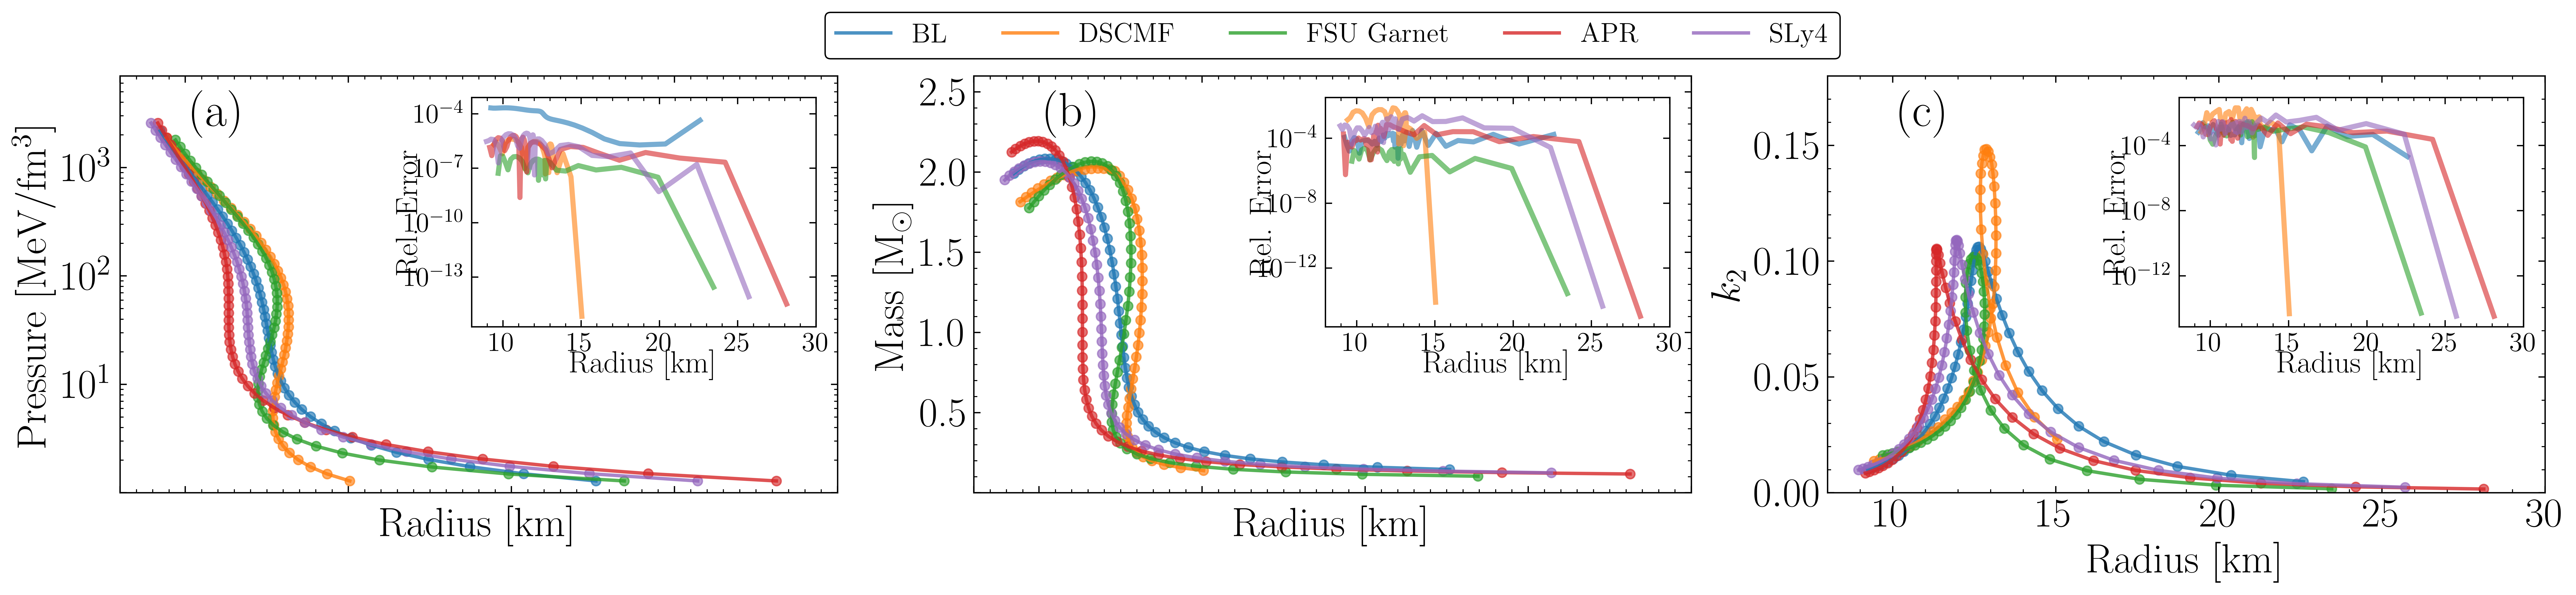

In [44]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


min_R = 8
max_R = 30

fig, ax = plt.subplots(1, 3, dpi=dpi, figsize=(3 * figsize[0], figsize[1]), constrained_layout=False)

# define the inset exes
# P-R
inset_ax_PR = inset_axes(ax[0],
                         width="48%",
                         height="55%",
                         loc="upper right", 
                         borderpad=1.4)
# M-R
inset_ax_MR = inset_axes(ax[1],
                         width="48%",
                         height="55%",
                         loc="upper right", 
                         borderpad=1.4)
# T-R
inset_ax_TR = inset_axes(ax[2],
                         width="48%",
                         height="55%",
                         loc="upper right", 
                         borderpad=1.4)


colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
lines_plotted = []
for i, eos_name in enumerate(eos_file_names):
    color = colors[i]
    tov_run = all_of_the_tov_data[i]
    SLM_run = all_of_the_SLM_data[i]

    
    SLM_x = SLM_run[0]
    
    # interpolate the data
    # pressure-radius (in log space)
    PR_x_new, PR_y_new = the_good_interpolator(tov_run[0, :], np.log(tov_run[1, :]), SLM_x)
    PR_y_new = np.exp(PR_y_new)
    # mass-radius
    MR_x_new, MR_y_new = the_good_interpolator(tov_run[0, :], tov_run[2, :], SLM_x)
    MR_y_new = MR_y_new
    # tidal-radius
    TR_x_new, TR_y_new = the_good_interpolator(tov_run[0, :], tov_run[3, :], SLM_x)
    TR_y_new = TR_y_new
    
    # TOV plots
    # the tov results
    # test = ax[0].plot(tov_run[0, :], tov_run[1, :], 
    #            color=color, 
    #            linewidth=tov_linewidth,
    #            alpha=tov_alpha, zorder=1, 
    #            label=f"{eos_name}")
    # ax[1].plot(tov_run[0, :], tov_run[2, :], 
    #            color=color, 
    #            linewidth=tov_linewidth,
    #            alpha=tov_alpha, zorder=1,
    #            label=f"{eos_name}")
    # ax[2].plot(tov_run[0, :], tov_run[3, :], 
    #            color=color, 
    #            linewidth=tov_linewidth,
    #            alpha=tov_alpha, zorder=1,
    #            label=f"{eos_name}")
    # lines_plotted.append(test)
    test = ax[0].scatter(tov_run[0, :], tov_run[1, :], 
                         color=color, 
                         # linewidth=tov_linewidth,
                         s=SLM_dot_size,
                         alpha=tov_alpha, zorder=1, )
                        #  label=f"{eos_name}")
    ax[1].scatter(tov_run[0, :], tov_run[2, :], 
                  color=color, 
                  # linewidth=tov_linewidth,
                  s=SLM_dot_size,
                  alpha=tov_alpha, zorder=1, )
                #   label=f"{eos_name}")
    ax[2].scatter(tov_run[0, :], tov_run[3, :], 
                  color=color, 
                  # linewidth=tov_linewidth,
                  s=SLM_dot_size,
                  alpha=tov_alpha, zorder=1, )
                #   label=f"{eos_name}")
    lines_plotted.append(test)
    
    # # the tov results interpolated onto the SLM x-values
    # ax[0].scatter(PR_x_new, PR_y_new, 
    #               color="black", zorder=3, s=5)
    # ax[1].scatter(MR_x_new, MR_y_new, 
    #               color="black", zorder=3, s=5)
    # ax[2].scatter(TR_x_new, TR_y_new, 
    #               color="black", zorder=3, s=10)
    
    # SLM plots
    ax[0].plot(SLM_x, SLM_run[1], 
               color=color, 
               # s=SLM_dot_size, 
               linewidth=tov_linewidth,
               alpha=SLM_alpha, zorder=2, 
               label=f"{eos_name}")
    ax[1].plot(SLM_x, SLM_run[2], 
               color=color, 
               # s=SLM_dot_size,
               linewidth=tov_linewidth, 
               alpha=SLM_alpha, zorder=2, 
               label=f"{eos_name}")
    ax[2].plot(SLM_x, SLM_run[3], 
               color=color, 
               # s=SLM_dot_size,
               linewidth=tov_linewidth, 
               alpha=SLM_alpha, zorder=2, 
               label=f"{eos_name}")
    
    
    # get the inset plots
    
    # first look at the residuals
    method = "rel"
    PR_residual = calc_error(PR_y_new, SLM_run[1], method=method)
    MR_residual = calc_error(MR_y_new, SLM_run[2], method=method)
    TR_residual = calc_error(TR_y_new, SLM_run[3], method=method)
    # PR_residual = (PR_y_new - SLM_run[1]) / PR_y_new
    # MR_residual = (MR_y_new - SLM_run[2]) / MR_y_new
    # TR_residual = (TR_y_new - SLM_run[3]) / TR_y_new
    
    # print(SLM_x - np.abs(PR_residual))
    inset_ax_PR.plot(SLM_x, np.abs(PR_residual), 
                     color=color, alpha=res_alpha, linewidth=res_linewidth)
    inset_ax_PR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
    inset_ax_PR.xaxis.set_label_coords(0.5, -0.1)
    inset_ax_PR.set_xlim(min_R, max_R)
    # inset_ax_PR.set_xticks([10, 20, 30])
    inset_ax_PR.set_xticks([10, 15, 20, 25, 30])
    inset_ax_PR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
    inset_ax_PR.yaxis.set_label_coords(-0.14, 0.5)
    inset_ax_PR.set_yscale("log")
    make_the_axes_look_nice(inset_ax_PR)
    
    inset_ax_MR.plot(SLM_x, np.abs(MR_residual), 
                     color=color, alpha=res_alpha, linewidth=res_linewidth)
    inset_ax_MR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
    inset_ax_MR.xaxis.set_label_coords(0.5, -0.1)
    inset_ax_MR.set_xlim(min_R, max_R)
    # inset_ax_MR.set_xticks([10, 20, 30])
    inset_ax_MR.set_xticks([10, 15, 20, 25, 30])
    inset_ax_MR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
    inset_ax_MR.yaxis.set_label_coords(-0.14, 0.5)
    inset_ax_MR.set_yscale("log")
    make_the_axes_look_nice(inset_ax_MR)
    
    inset_ax_TR.plot(SLM_x, np.abs(TR_residual), 
                     color=color, alpha=res_alpha, linewidth=res_linewidth)
    inset_ax_TR.set_xlabel("Radius [km]", fontsize=res_axis_label_size)
    inset_ax_TR.xaxis.set_label_coords(0.5, -0.1)
    inset_ax_TR.set_xlim(min_R, max_R)
    # inset_ax_TR.set_xticks([10, 20, 30])
    inset_ax_TR.set_xticks([10, 15, 20, 25, 30])
    inset_ax_TR.set_ylabel("Rel. Error", fontsize=res_axis_label_size)
    inset_ax_TR.yaxis.set_label_coords(-0.14, 0.5)
    inset_ax_TR.set_yscale("log")
    make_the_axes_look_nice(inset_ax_TR)

# first plot details
ax[0].set_xlim(min_R, max_R)
ax[0].set_xticks([ 8, 10, 15, 20, 25, 30],
                 ["", "", "", "", "", ""])
ax[0].set_ylabel("Pressure [MeV/fm$^3$]", fontsize=axis_label_size)
ax[0].set_yscale("log")
ax[0].set_yticks([1, 10, 100, 1000], ["", "$10^1$", "$10^2$", "$10^3$"])
ax[0].set_ylim(1, 7e3)
ax[0].tick_params(which='minor', length=2)
ax[0].tick_params(bottom=True, labelbottom=True,
                  top=True, labeltop=False,
                  right=True, labelright=False,
                  left=True, labelleft=True)
ax[0].xaxis.set_tick_params(labelsize=tick_size)
ax[0].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
ax[0].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
ax[0].yaxis.set_tick_params(labelsize=tick_size)
ax[0].yaxis.set_ticks_position('both')  # get minor ticks on left and right sides

# second plot details
ax[1].set_xlim(min_R, max_R)
ax[1].set_xticks([ 8, 10, 15, 20, 25, 30],
                 ["", "", "", "", "", ""])
ax[1].set_ylim(0, 2.6)
ax[1].set_yticks([0, 0.5, 1, 1.5, 2, 2.5],
                 ["", "0.5", "1.0", "1.5", "2.0", "2.5"])
ax[1].set_ylabel(r"Mass [$\rm{M}_{\odot}$]", fontsize=axis_label_size)
ax[1].tick_params(which='minor', length=2)
ax[1].tick_params(bottom=True, labelbottom=True,
                  top=True, labeltop=False,
                  right=True, labelright=False,
                  left=True, labelleft=True)
ax[1].xaxis.set_tick_params(labelsize=tick_size)
ax[1].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
ax[1].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
ax[1].yaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on y-axis
ax[1].yaxis.set_tick_params(labelsize=tick_size)
ax[1].yaxis.set_ticks_position('both')  # get log-ticks on left and right sides

# third plot details
ax[2].set_xlim(min_R, max_R)
ax[2].set_xticks([10, 15, 20, 25, 30])
ax[2].set_ylabel("$k_2$", fontsize=axis_label_size)
ax[2].set_ylim(0, 0.18)
ax[2].tick_params(which='minor', length=2)
ax[2].tick_params(bottom=True, labelbottom=True,
                  top=True, labeltop=False,
                  right=True, labelright=False,
                  left=True, labelleft=True)
ax[2].xaxis.set_tick_params(labelsize=tick_size)
ax[2].xaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on x-axis
ax[2].xaxis.set_ticks_position('both')  # get minor ticks on top and bottom sides
ax[2].yaxis.set_tick_params(labelsize=tick_size)
ax[2].yaxis.set_minor_locator(plot_scripts.AutoMinorLocator())  # get minor ticks on y-axis
ax[2].yaxis.set_ticks_position('both')  # get log-ticks on left and right sides


# final adjustments
legend = ax[1].legend(fontsize=legend_size, 
                      loc="upper center",   # centered along x
                      ncols=5,
                      bbox_to_anchor=(0.5, 1.205), # 0.5 for x-centering, 1.205 set by-eye to see what was good enough
                      frameon=True,
                      facecolor="none")

# # oh my god why was this so hard
# for i, t in enumerate(legend.get_texts()):
#     if (i == 1) or (i == 3):
#         if i == 1:
#             shift = 73
#         elif i == 3:
#             shift = 85
#         t.set_position((shift, 0))
# for i, line in enumerate(legend.get_lines()):
#     if (i == 1) or (i == 3):
#         if i == 1:
#             shift = -5
#         elif i == 3:
#             shift = 9
#         line.set_xdata(line.get_xdata() + shift + 79)


# # label each panel
# y_weight = 0.9
# x_loc = 8.6

# x_min, x_max, y_min, y_max = ax[0].axis()
# # ax[0].text(9, np.exp((np.log(y_max) + np.log(y_min)) * 0.5), "(a)", fontsize=28)  # middle
# ax[0].text(x_loc, np.exp((np.log(y_max) + np.log(y_min)) * y_weight), "(a)", fontsize=28)  # upper left corner

# x_min, x_max, y_min, y_max = ax[1].axis()
# # ax[1].text(9, (y_max + y_min) * 0.5, "(b)", fontsize=28)  # middle
# ax[1].text(x_loc, (y_max + y_min) * y_weight, "(b)", fontsize=28)  # upper left corner

# x_min, x_max, y_min, y_max = ax[2].axis()
# # ax[2].text(9, (y_max + y_min) * 0.5, "(c)", fontsize=28)  # middle
# ax[2].text(x_loc, (y_max + y_min) * y_weight, "(c)", fontsize=28)  # upper left corner

# label each panel
# y_weight = 0.33
y_weight = 0.88
x_loc = (max_R - min_R) * (0.1) + min_R  # 0.080
x_min, x_max, y_min, y_max = ax[0].axis()
# ax[0].text(9, np.exp((np.log(y_max) + np.log(y_min)) * 0.5), "(a)", fontsize=28)  # middle
ax[0].text(x_loc, np.exp((np.log(y_max) + np.log(y_min)) * y_weight), "(a)", fontsize=28)  # lower left corner
x_min, x_max, y_min, y_max = ax[1].axis()
# ax[1].text(9, (y_max + y_min) * 0.5, "(b)", fontsize=28)  # middle
ax[1].text(x_loc, (y_max + y_min) * y_weight, "(b)", fontsize=28)  # lower left corner
x_min, x_max, y_min, y_max = ax[2].axis()
# ax[2].text(9, (y_max + y_min) * 0.5, "(c)", fontsize=28)  # middle
ax[2].text(x_loc, (y_max + y_min) * y_weight, "(c)", fontsize=28)  # lower left corner


ax[0].set_xlabel("Radius [km]", fontsize=axis_label_size)
ax[1].set_xlabel("Radius [km]", fontsize=axis_label_size)
ax[2].set_xlabel("Radius [km]", fontsize=axis_label_size)
plt.tight_layout()
plt.subplots_adjust(wspace=0.19)

# deal with figure not being nonsense in the pdf file
# Lock the legend in absolute figure coordinates
# legend.set_transform(fig.transFigure)
# legend.set_rasterized(True)  # Rasterize only the legend

if save_figures:
    plt.savefig(f"{save_location}/3-eos-panel_plot-horizontal.png", bbox_inches="tight")
    plt.savefig(f"{save_location}/3-eos-panel_plot-horizontal.pdf", bbox_inches="tight")
    # plt.savefig(f"{save_location}/3-eos-panel_plot.svg", bbox_inches="tight")
    print("figure saved")
plt.show(fig)
